In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cftime
import cmocean.cm as cmo
import pandas as pd

import xarray as xr

In [3]:
ds = xr.open_dataset('/scratch/training/CESM_post/datasets/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.001/ocn/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.001.pop.h.0038-04.nc')
#ds = xr.open_dataset('/scratch/training/CESM_post/datasets/hires/B.E.13.B1950C5.ne120_t12.cesm-ihesp-1950cntl.013.pop.h.0060-01.nc')
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    transport_components  (transport_comp) |S256 ...
    transport_regions     (transport_reg) |S256 ...
  * time                  (time) object 0038-05-01 00:00:00
  * z_t                   (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_top               (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                 (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables:
    time_bound            (time, d2) object ...
    moc_components        (moc_comp) |S256 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    REGION_MASK           (nlat, nlon) float64 ...
    UAREA                 (nlat, nlon) float64 ...
    TAREA                 (nlat, nlon) float64 ...
    HU                    (nlat, nlon) float64 ...
    HT                    (nlat, nlon) float64 ...
    DXU                   (nlat, nlon) float64 ...
    DYU                   (nlat, nlon) float64 ...
    DXT                   (nlat, nlon) float64 ...
    DYT                   (nlat, nlon) float64 ...
    HTN                   (nlat, nlon) float64 ...
    HTE                   (nlat, nlon) float64 ...
    HUS                   (nlat, nlon) float64 ...
    HUW                   (nlat, nlon) float64 ...
    ANGLE                 (nlat, nlon) float64 ...
    ANGLET                (nlat, nlon) float64 ...
    days_in_norm_year     timedelta64[ns] ...
    grav                  float64 ...
    omega                 float64 ...
    radius                float64 ...
    cp_sw                 float64 ...
    sound                 float64 ...
    vonkar                float64 ...
    cp_air                float64 ...
    rho_air               float64 ...
    rho_sw                float64 ...
    rho_fw                float64 ...
    stefan_boltzmann      float64 ...
    latent_heat_vapor     float64 ...
    latent_heat_fusion    float64 ...
    ocn_ref_salinity      float64 ...
    sea_ice_salinity      float64 ...
    T0_Kelvin             float64 ...
    salt_to_ppt           float64 ...
    ppt_to_salt           float64 ...
    mass_to_Sv            float64 ...
    heat_to_PW            float64 ...
    salt_to_Svppt         float64 ...
    salt_to_mmday         float64 ...
    momentum_factor       float64 ...
    hflux_factor          float64 ...
    fwflux_factor         float64 ...
    salinity_factor       float64 ...
    sflux_factor          float64 ...
    nsurface_t            float64 ...
    nsurface_u            float64 ...
    UVEL                  (time, z_t, nlat, nlon) float32 ...
    UVEL2                 (time, z_t, nlat, nlon) float32 ...
    VVEL                  (time, z_t, nlat, nlon) float32 ...
    VVEL2                 (time, z_t, nlat, nlon) float32 ...
    KE                    (time, z_t, nlat, nlon) float32 ...
    TEMP                  (time, z_t, nlat, nlon) float32 ...
    dTEMP_POS_2D          (time, nlat, nlon) float32 ...
    dTEMP_NEG_2D          (time, nlat, nlon) float32 ...
    SALT                  (time, z_t, nlat, nlon) float32 ...
    RHO 

In [7]:
ds.dims

Frozen(SortedKeysDict({'time': 1, 'd2': 2, 'moc_comp': 3, 'transport_comp': 5, 'transport_reg': 2, 'z_t': 60, 'z_t_150m': 15, 'z_w': 60, 'z_w_top': 60, 'z_w_bot': 60, 'lat_aux_grid': 395, 'moc_z': 61, 'nlat': 384, 'nlon': 320}))

In [8]:
ds.coords

Coordinates:
    transport_components  (transport_comp) |S256 b'Total' ... b'Submeso Advection'
    transport_regions     (transport_reg) |S256 b'Global Ocean - Marginal Seas' b'Atlantic Ocean + Mediterranean Sea + Labrador Sea + GIN Sea + Arctic Ocean + Hudson Bay'
  * time                  (time) object 0038-05-01 00:00:00
  * z_t                   (z_t) float32 500.0 1500.0 ... 512502.8 537500.0
  * z_t_150m              (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_top               (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot               (z_w_bot) float32 1000.0 2000.0 ... 549999.06
  * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
  * moc_z                 (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat

In [9]:
ds.data_vars

Data variables:
    time_bound          (time, d2) object 0038-04-01 00:00:00 0038-05-01 00:00:00
    moc_components      (moc_comp) |S256 b'Eulerian Mean' ... b'Submeso'
    dz                  (z_t) float32 1000.0 1000.0 ... 24996.244 24998.11
    dzw                 (z_w) float32 500.0 1000.0 ... 24994.459 24997.176
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    UAREA               (nlat, nlon) float64 ...
    TAREA               (nlat, nlon) float64 ...
    HU                  (nlat, nlon) float64 ...
    HT                  (nlat, nlon) float64 ...
    DXU                 (nlat, nlon) float64 ...
    DYU                 (nlat, nlon) float64 ...
    DXT                 (nlat, nlon) float64 ...
    DYT                 (nlat, nlon) float64 ...
    HTN                 (nlat, nlon) float64 ...
    HTE                 (nlat, nlon) float64 ...
    HUS                 (nlat, nlon) float

In [10]:
ds.SALT

<xarray.DataArray 'SALT' (time: 1, z_t: 60, nlat: 384, nlon: 320)>
[7372800 values with dtype=float32]
Coordinates:
  * time     (time) object 0038-05-01 00:00:00
  * z_t      (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean

In [16]:
ds.SALT.isel(z_t=1)

<xarray.DataArray 'SALT' (time: 1, nlat: 384, nlon: 320)>
[122880 values with dtype=float32]
Coordinates:
  * time     (time) object 0038-05-01 00:00:00
    z_t      float32 1500.0
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean

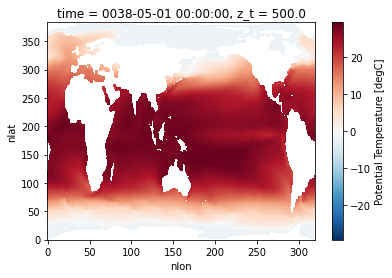

In [25]:
ds.TEMP.sel(z_t='500').plot()

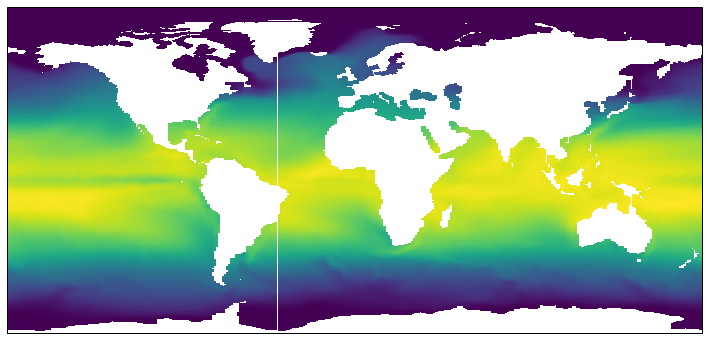

In [45]:
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());

lon = ds.TLONG
lat = ds.TLAT
var = ds.TEMP.isel(time=0,z_t=0)

ax.pcolormesh(lon,lat,var,transform=cartopy.crs.PlateCarree());

[[-79.22052261 -79.22052261 -79.22052261 ... -79.22052261 -79.22052261
  -79.22052261]
 [-78.68630626 -78.68630626 -78.68630626 ... -78.68630626 -78.68630626
  -78.68630626]
 [-78.15208992 -78.15208992 -78.15208992 ... -78.15208992 -78.15208992
  -78.15208992]
 ...
 [ 71.29031715  71.29408252  71.30160692 ...  71.30160692  71.29408252
   71.29031716]
 [ 71.73524335  71.73881845  71.74596231 ...  71.74596231  71.73881845
   71.73524335]
 [ 72.18597561  72.18933231  72.19603941 ...  72.19603941  72.18933231
   72.18597562]]


ValueError: dimensions or multi-index levels ['TLAT', 'TLONG'] do not exist

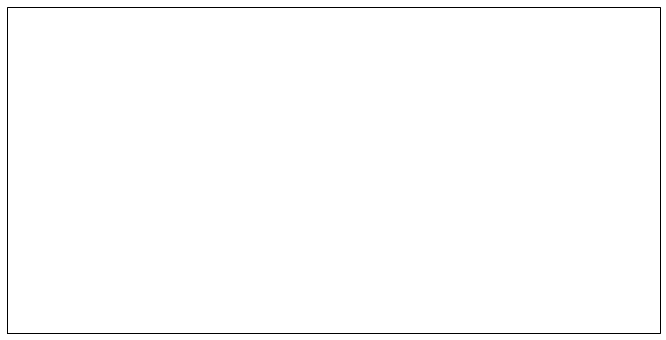

In [56]:
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());
print(ds.TLAT.values)
lon = ds.TLONG.sel(TLAT=slice(-10,10),TLONG=slice(0,100),method='nearest')
print(lon)
lat = ds.TLAT.sel(nlat=slice(-10,10),nlon=slice(0,100))
var = ds.TEMP.sel(time='0038-05-01',z_t='500',nlat=slice(-10,10),nlon=slice(0,100))
#ax.pcolormesh(lon,lat,var,transform=cartopy.crs.PlateCarree());